# **k-Means Clustering with Credit Card Customer Data**

## **Introduction**

k-Means Clustering is an unsupervised algorithm used for partitioning data into clusters based on similarity. It aims to group data points such that points within the same cluster are more similar to each other than to those in other clusters. This technique finds applications in customer segmentation, image compression, and anomaly detection, among other areas.

### k-Means Algorithm

The k-Means algorithm can be summarized as follows:

- **Initialization**: The process begins with the random selection of k initial cluster centroids.
- **Assignment**: Each data point is assigned to the nearest cluster based on centroid proximity.
- **Update Centroids**: Cluster centroids are recalculated as the mean of the data points within each cluster.
- **Iteration**: The assignment and centroid update steps are repeated until convergence is achieved (i.e., centroids no longer change significantly) or a specified number of iterations is reached.

## Advantages and Disadvantages

### Advantages

Advantages include the algorithm's simplicity, speed, scalability, and the interpretability of its results.

- **Simplicity**: k-Means is easy to understand and implement, making it a popular choice for clustering tasks.
- **Speed**: It is computationally efficient and works well with large datasets.
- **Scalability**: Suitable for both small and large datasets with varying dimensions.
- **Interpretability**: Results are easy to interpret, as clusters are defined by centroids.

### Disadvantages

Disadvantages involve sensitivity to initial centroid placement, the assumption of equal cluster variance and spherical shapes, and the requirement to predefine the number of clusters (k).

- **Sensitivity to Initialization**: The choice of initial centroids can impact the final clustering results.
- **Assumes Equal Variance**: k-Means assumes that clusters have roughly equal variance and are spherical, which may not hold in all cases.
- **Requires Predefined k**: The number of clusters (k) needs to be specified in advance, which can be challenging.

### We'll follow these steps:

1. **Data Understanding and Preparation:** This includes loading the dataset, understanding its structure, and performing any necessary preprocessing steps such as cleaning and standardizing the data.

2. **Feature Selection:** Based on the dataset description, we'll decide which features are relevant for clustering. For customer segmentation, attributes like AvgCreditLimit, TotalCreditCards, Totalvisitsbank, Totalvisitsonline, and Totalcallsmade seem to be key features.

3. **Applying k-Means Clustering:** We'll use the k-Means algorithm to cluster the data. This involves selecting an appropriate number of clusters (k) and then running the algorithm to group customers into clusters based on their similarities.

4. **Evaluation and Interpretation:** After clustering, we'll evaluate the results to see how well our data has been grouped and interpret the characteristics of each cluster to understand customer segments better.

### Initial analysis to understand its structure and prepare it for the k-Means Clustering algorithm

The "Credit Card Customer Data" dataset consists of the following columns:

- Sl_No: Customer Serial Identification Number, serving as an index.
- Customer Key: A unique key for each customer.
- Avg_Credit_Limit: Average credit card limit for the customer.
- Total_Credit_Cards: Total number of credit cards owned by the customer.
- Total_visits_bank: Total number of bank visits by the customer.
- Total_visits_online: Total number of online visits by the bank customer.
- Total_calls_made: Total calls made by the customer to the bank.

For the purpose of k-Means Clustering, we will consider the following features as they are likely to be significant for customer segmentation: Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, and Total_calls_made. The Sl_No and Customer Key columns will be excluded from the clustering process as they are identifiers rather than features that describe customer behavior.

Let's proceed by standardizing the feature columns and then applying k-Means Clustering to identify customer segments. We'll start by determining the optimal number of clusters using the Elbow Method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow" point where the rate of decrease sharply changes. This point is generally considered as an indicator of the optimal number of clusters. ​​

In [3]:
import pandas as pd

# Load the dataset
data_path = 'Credit Card Customer Data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


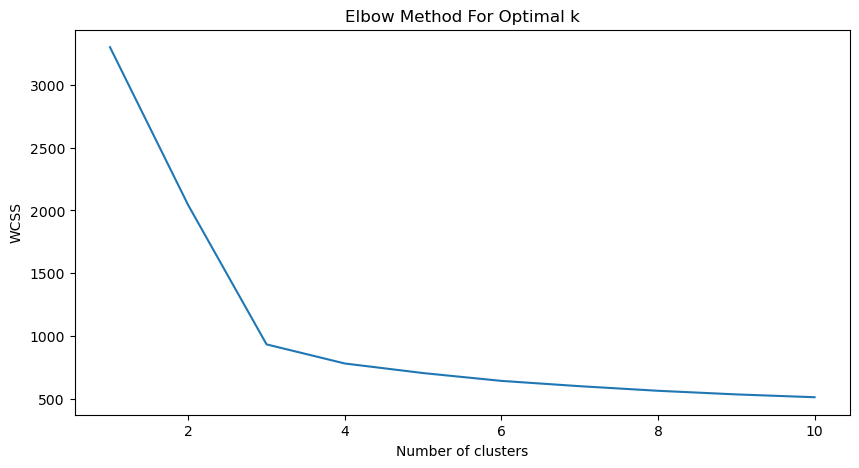

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data_path = 'Credit Card Customer Data.csv'
df = pd.read_csv(data_path)

# Selecting relevant features for clustering
features = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying the Elbow Method to find the optimal number of clusters
wcss = [] # List to hold the values of WCSS
for i in range(1, 11): # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_) # Append the WCSS (inertia_) to the list

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method plot shows how the Within-Cluster Sum of Squares (WCSS) decreases with an increasing number of clusters. Observing the plot, we look for the "elbow" point where the rate of decrease in WCSS becomes less significant, indicating the optimal number of clusters for our k-Means clustering.

While the exact "elbow" point might not be distinctly sharp in every dataset, we typically select a point where adding more clusters does not provide much better modeling of the data. In this case, the plot suggests that around 3 to 5 clusters could be considered optimal, as the slope of the line starts to flatten out after this point.

Based on this analysis, let's proceed with clustering the data into an initially chosen number of clusters. We can start with 4 clusters and then analyze the characteristics of each cluster to understand the segmentation of credit card customers. This will involve fitting the k-Means model to the standardized features and then examining the cluster centers and distribution of customers across the clusters.

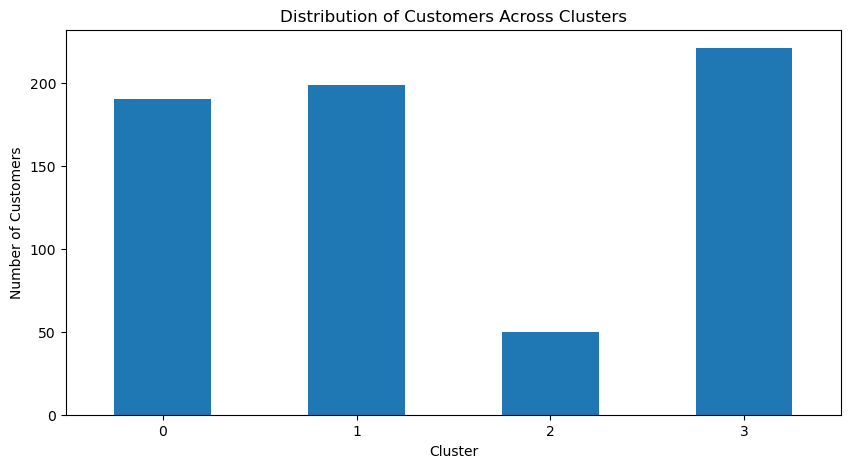

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data_path = 'Credit Card Customer Data.csv'
df = pd.read_csv(data_path)

# Selecting relevant features for clustering based on your dataset
features = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying k-Means Clustering to determine cluster labels
# Here, we're assuming you've determined the optimal number of clusters (let's use 4 as an example)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Counting the number of customers in each cluster
cluster_distribution = df['Cluster'].value_counts().sort_index()

# Plotting the distribution of customers across clusters
plt.figure(figsize=(10, 5))
cluster_distribution.plot(kind='bar')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()



The clustering process has divided the credit card customers into 4 distinct groups, as indicated by the distribution of customers across clusters and the characteristics of each cluster:

- **Cluster 0:** This cluster has an average credit limit of approximately $31,226 and an average of 5.48 credit cards per customer. These customers tend to visit the bank quite frequently (about 4.52 times) but have the lowest online visit frequency (1.01 times on average) and make a moderate number of calls to the bank (1.94 times on average).

- **Cluster 1:** Customers in this cluster have a lower average credit limit of around $12,167 and the lowest number of credit cards (about 2.39 on average). They rarely visit the bank (0.93 times on average), have a relatively higher number of online visits (3.57 times on average), and make the most calls to the bank (about 6.92 times on average), indicating a preference for remote interaction.

- **Cluster 2:** This cluster represents the high-end segment with the highest average credit limit of $141,040 and the most credit cards (8.74 on average). These customers have the least frequency of bank visits (0.6 times on average) but are the most active online (10.9 visits on average) and make the least number of calls (1.08 times on average), suggesting a preference for digital banking solutions.

- **Cluster 3:** Customers in this cluster have an average credit limit of $35,905 and an average of 5.52 credit cards, similar to Cluster 0. They visit the bank and call the bank at moderate rates (2.48 and 2.08 times on average, respectively) but have the lowest online visit frequency (about 0.97 times), suggesting a preference for traditional banking methods over online banking.

The distribution chart and the cluster centers reveal distinct customer behaviors and preferences:

- **Traditional Bank Visitors (Cluster 0):** Prefer visiting the bank in person and have a moderate engagement with banking services.

- **Remote Interaction Seekers (Cluster 1):** Have lower credit limits, fewer credit cards, prefer remote interactions (calls and online visits), and may need more personalized outreach.

- **High-End Digital Users (Cluster 2):** Exhibit high credit limits and card ownership, prefer online banking, and likely appreciate premium and digital-first banking services.

- **Mixed-Method Users (Cluster 3):** Show moderate engagement across all interaction methods without a strong preference for any, suggesting they utilize a balanced approach to banking services.

These insights can inform targeted marketing strategies, service improvements, and personalized customer engagement initiatives. ​​

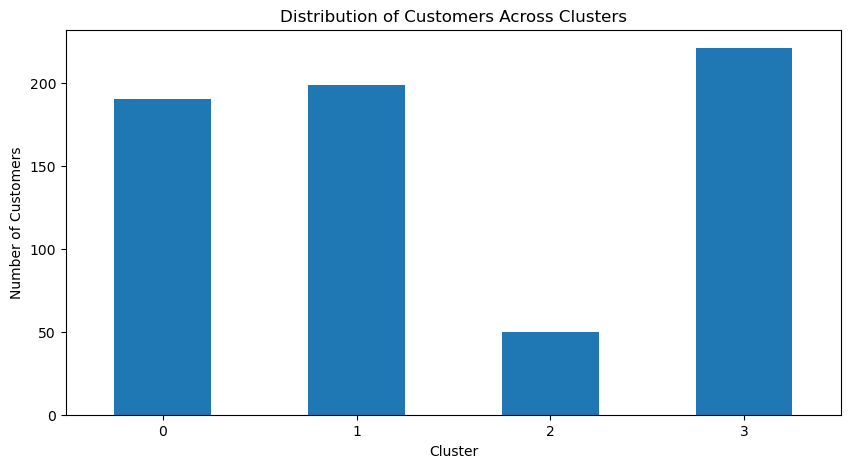

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      31226.315789            5.478947           4.515789   
1      35904.522613            5.522613           2.477387   
2     141040.000000            8.740000           0.600000   
3      12167.420814            2.393665           0.927602   

   Total_visits_online  Total_calls_made  
0             1.010526          1.936842  
1             0.969849          2.075377  
2            10.900000          1.080000  
3             3.574661          6.923077  


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data_path = 'Credit Card Customer Data.csv'  
df = pd.read_csv(data_path)

# Selecting relevant features for clustering based on your dataset
features = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying k-Means Clustering with the chosen number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to our original dataframe for further analysis
df['Cluster'] = cluster_labels

# Visualizing the distribution of customers across the clusters
cluster_distribution = df['Cluster'].value_counts().sort_index()

# Displaying the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)

# Plotting the distribution and printing the cluster centers
plt.figure(figsize=(10, 5))
cluster_distribution.plot(kind='bar')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

print(cluster_centers)


#### **Cluster 1**

- Average Credit Limit: $35,905

- Total Credit Cards: Approximately 5.52

- Total Visits to Bank: 2.48 times

- Total Visits Online: 0.97 times

- Total Calls Made: 2.08 times

Customers in this cluster have a slightly higher credit limit and a similar number of credit cards compared to Cluster 0 but visit the bank less frequently. Their engagement with online services is the lowest among all clusters, and they have a moderate frequency of calls to the bank. This group seems to balance between traditional banking methods and digital engagement.

#### **Cluster 2**

- Average Credit Limit: $141,040

- Total Credit Cards: 8.74

- Total Visits to Bank: 0.6 times

- Total Visits Online: 10.9 times

-Total Calls Made: 1.08 times

This cluster includes high-end customers with the highest average credit limit and the most credit cards. They rarely visit the bank but are very active online, indicating a preference for managing their banking needs digitally. Their call frequency to the bank is relatively low, which further emphasizes their inclination towards online banking solutions.

#### **Cluster 3**

- Average Credit Limit: $12,167

- Total Credit Cards: 2.39

- Total Visits to Bank: 0.93 times

- Total Visits Online: 3.57 times

- Total Calls Made: 6.92 times

Cluster 3 represents customers with the lowest average credit limit and the fewest number of credit cards. They are the least likely to visit the bank and have moderate online engagement. However, they stand out for their high frequency of calls to the bank, suggesting they may prefer resolving their banking issues or conducting transactions over the phone.

## **Conclusion**

The k-Means clustering of the "Credit Card Customer Data" has successfully segmented the bank's customers into four distinct groups based on their credit limit, number of credit cards, and interaction preferences with the bank (in-person, online, and via phone).

Clusters 0 and 1 are more inclined towards traditional banking, with Cluster 0 showing a strong preference for in-person visits.

Cluster 2 represents high-value customers who favor digital channels for their banking needs, making them prime candidates for online banking services and digital product offerings.

Cluster 3 customers require more support over the phone, possibly indicating a demographic that is less tech-savvy or prefers personalized service.

These insights can guide targeted marketing strategies, service improvement initiatives, and personalized customer engagement efforts. By understanding the distinct needs and preferences of each customer segment, the bank can tailor its products, services, and communication channels to enhance customer satisfaction and loyalty.